In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:

# header = [f'{ia}{ib}' for ia in ['Qu', 'Qd', 'Qs', 'um1', 'dm1', 'sm1', 'G', 'G2'] for ib in ['a', 'b', 'c']]
# fit_df = pd.read_csv('dsa_mc/dipoles/replica_params.csv', index_col=0)

header = ['Solution','rchi2'] + [f'{ia}{ib}' for ia in ['Qu', 'Qd', 'um1', 'dm1', 'G', 'G2', 'QTu', 'QTd'] for ib in ['a', 'b', 'c']]
fit_df = pd.read_csv('updated_replica_params.csv', index_col=0)

fit_df = fit_df.dropna(axis=1, how='all')
fit_df.columns = header


In [17]:
fit_df['eqn79LHS_eta'] = fit_df['Ga'] + fit_df['Gb']
fit_df['eqn79LHS_const'] = fit_df['Gc']

fit_df['eqn79aRHS_eta'] = -(0.5/3.0)*(fit_df['Qua'] + fit_df['Qub'] + fit_df['Qda'] + fit_df['Qdb'])                      
fit_df['eqn79bRHS_eta'] = (0.25/3.0)*(fit_df['QTua'] + fit_df['QTub'] + fit_df['QTda'] + fit_df['QTdb'])
fit_df['eqn79aRHS_const'] = -(0.5/3.0)*(fit_df['Quc'] + fit_df['Qdc'])                      
fit_df['eqn79bRHS_const'] = (0.25/3.0)*(fit_df['QTuc'] + fit_df['QTdc'])



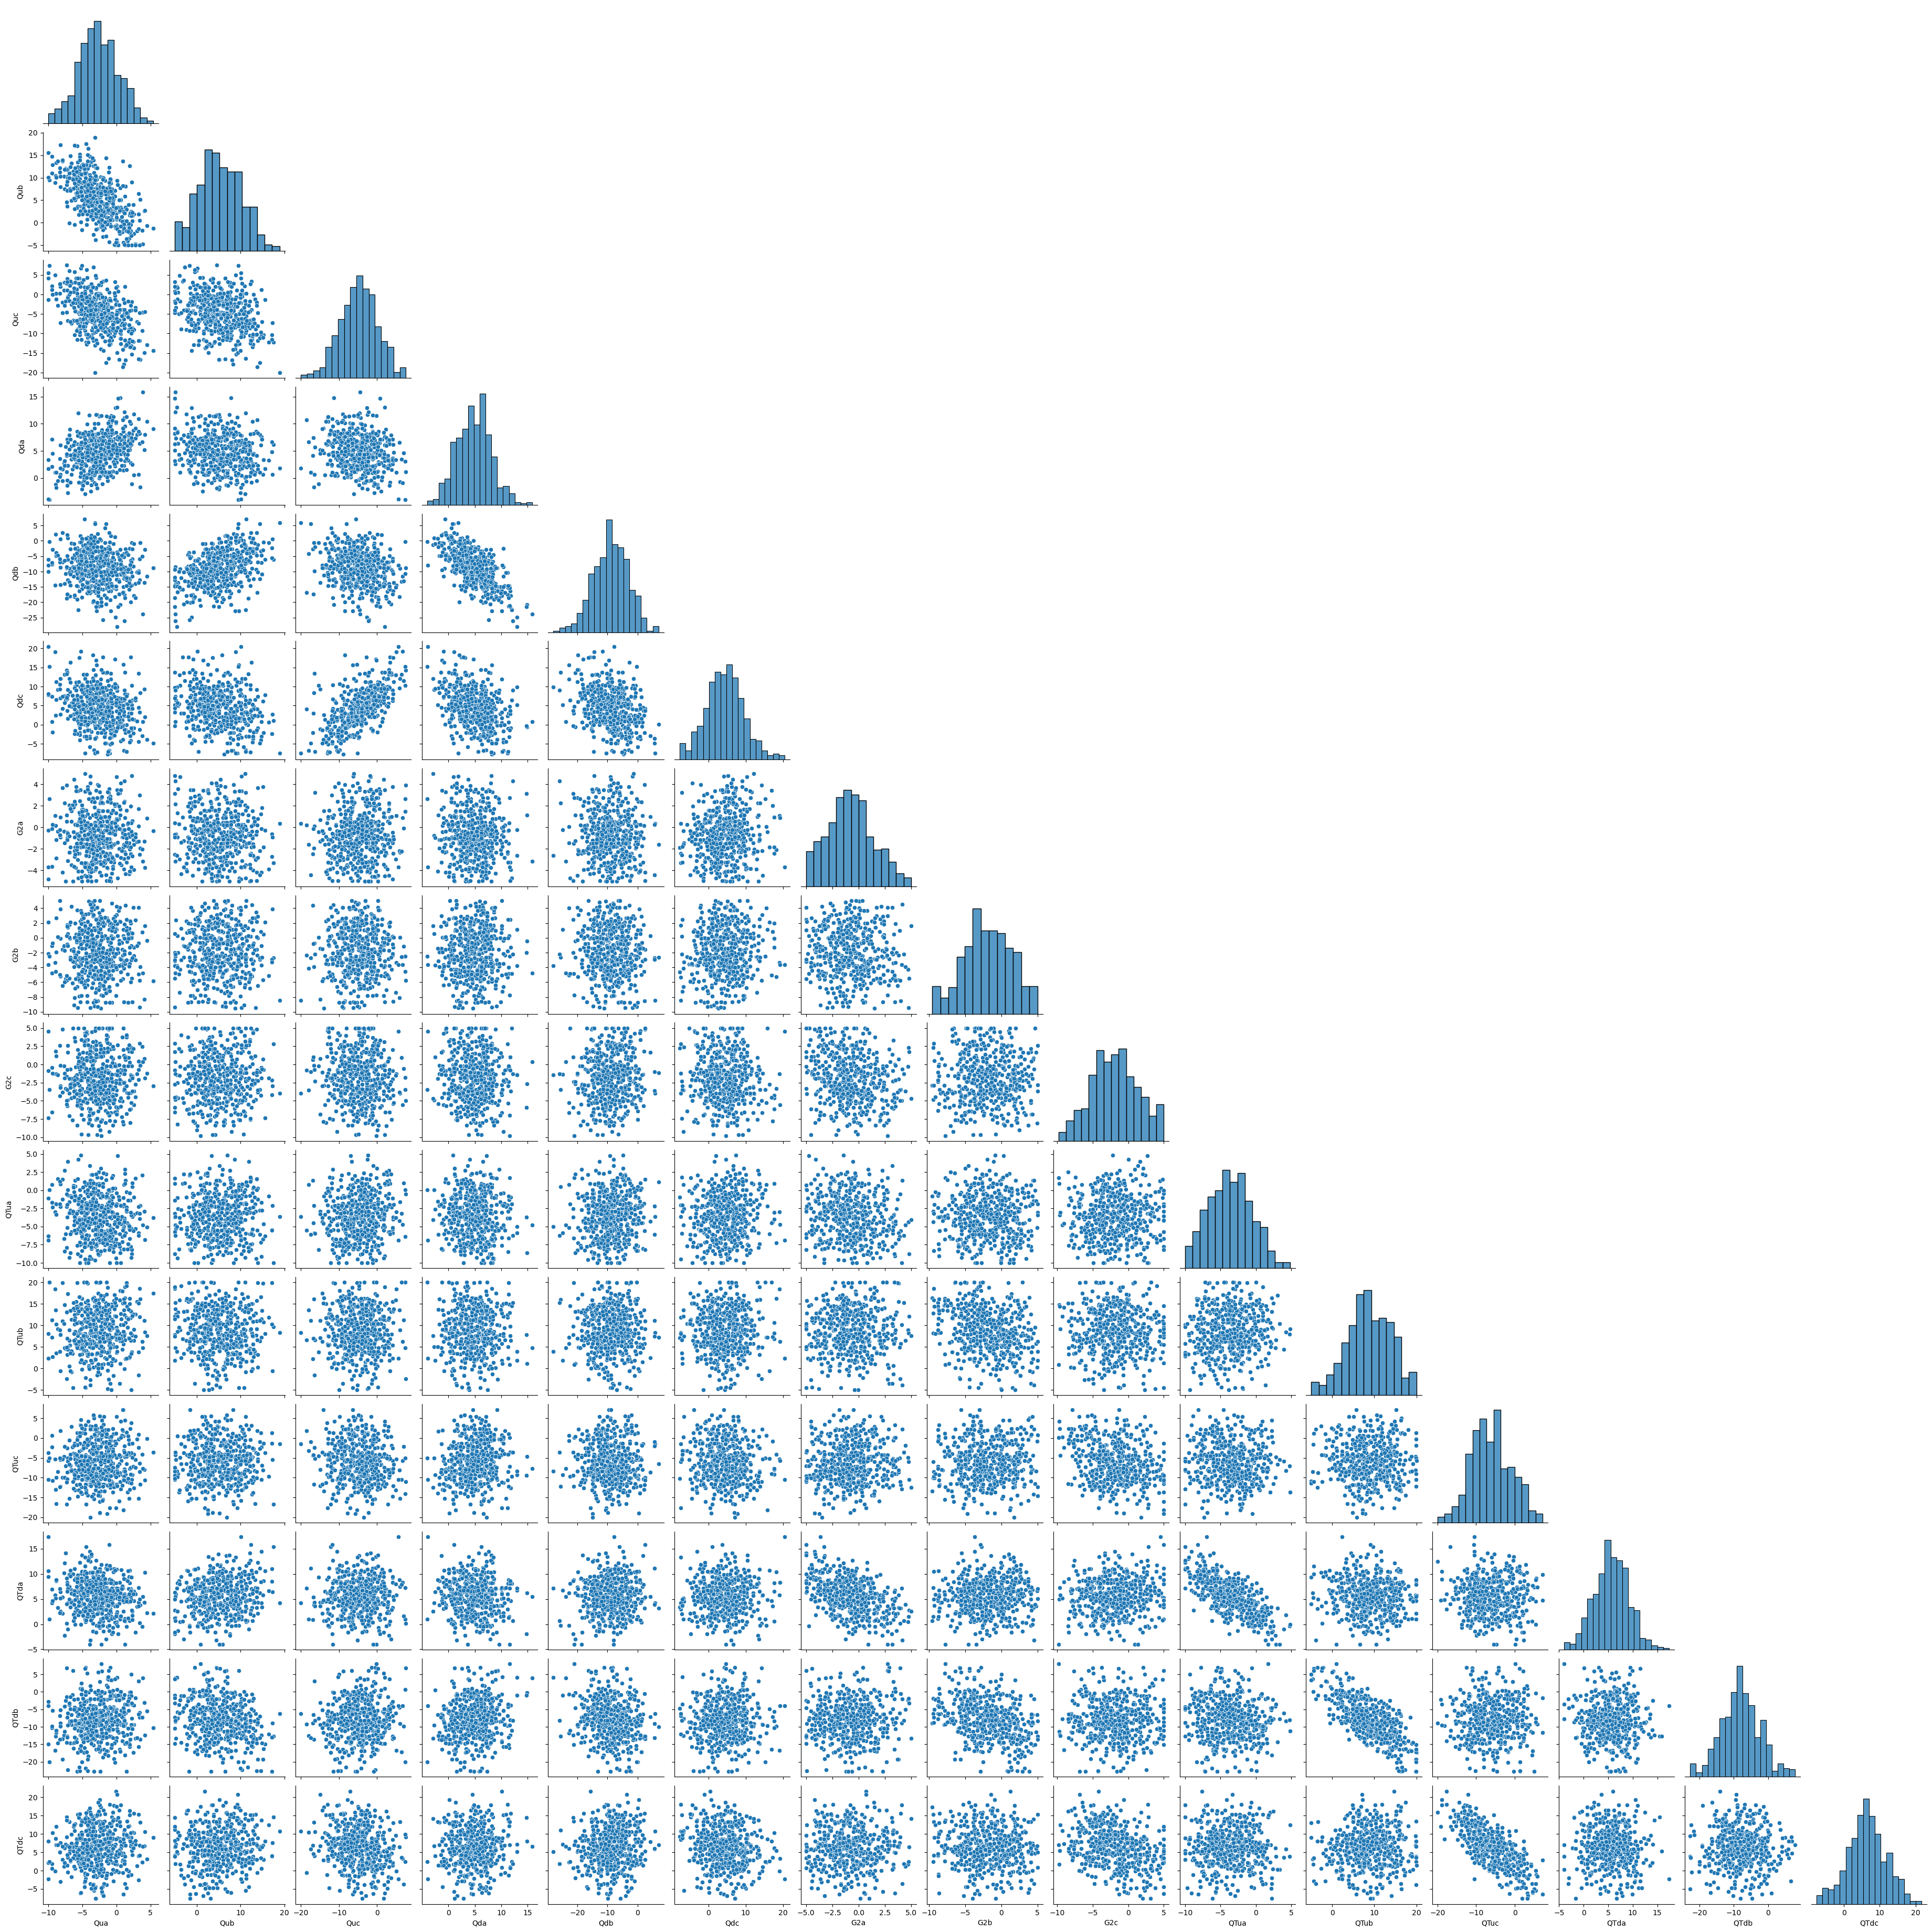

In [21]:
labels = fit_df.columns.tolist()

# plot = sns.pairplot(fit_df[['eqn79LHS_eta', 'eqn79LHS_const', 'eqn79aRHS_eta', 'eqn79bRHS_eta', 'eqn79aRHS_const', 'eqn79bRHS_const']], corner=True)

plot = sns.pairplot(fit_df[['Qua', 'Qub', 'Quc', 'Qda', 'Qdb', 'Qdc', 'G2a', 'G2b', 'G2c', 'QTua', 'QTub', 'QTuc', 'QTda', 'QTdb', 'QTdc']], corner=True)
# plot.savefig('plots/corner_plot_selected.pdf', dpi=750)
